# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
# Verififcando a dimensão da matriz de características (X) e do vetor-alvo(y)
# A instância X e y devem ter o mesmo número de 'amostras' e o y deve ter apenas uma dimensão.
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [5]:
# Verificando se o tipo de dados das matrizes de características (X) e vetores alvo (y) são numéricos. 
# O scikitlearn geralmente trabalha melhor com dados numéricos.
print(X.dtypes)
print(y.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
MEDV    float64
dtype: object


### Analisando a matriz de características (X) e o vetor-alvo (y) do conjunto de dados, pode-se afirmar que a base está no formato adequado para o uso da biblioteca scikitlearn

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [6]:
matriz_correlacao = X.corr()
matriz_correlacao

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Com base na matriz de correlação acima, as variáveis NOX e INDUS parecem ter um bom potencial preditivo

### 3. Separe os dados em validação e teste

In [7]:
X_teste, X_treino, y_teste, y_treino = train_test_split(
    X, y, test_size=0.7    
)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
tree_1 = DecisionTreeRegressor(max_depth=8)
tree_1 = tree_1.fit(X_treino, y_treino)

tree_2 = DecisionTreeRegressor(max_depth=2)
tree_2 = tree_2.fit(X_treino, y_treino)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [9]:
from sklearn.metrics import mean_squared_error as mse

train_score_1 = mse(y_treino, tree_1.predict(X_treino))
test_score_1 = mse(y_teste, tree_1.predict(X_teste))

train_score_2 = mse(y_treino, tree_2.predict(X_treino))
test_score_2 = mse(y_teste, tree_2.predict(X_teste))

print(f'MSE Árvore 1 - treino: {train_score_1}, Teste: {test_score_1}')
print(f'MSE Árvore 2 - treino: {train_score_2}, Teste: {test_score_2}')

MSE Árvore 1 - treino: 1.2398050505050506, Teste: 23.93773159730474
MSE Árvore 2 - treino: 22.53228273846978, Teste: 35.455033660605615


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [18]:
# A interpretação do resultado do MSE é quanto menor o valor, melhor. Portanto, a árvore 1, tem os menores resultados, logo me parece a mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.4274296675191816, 0.9444444444444444, 'LSTAT <= 9.63\nsquared_error = 80.849\nsamples = 355\nvalue = 22.285'),
 Text(0.19245524296675193, 0.8333333333333334, 'RM <= 7.445\nsquared_error = 74.993\nsamples = 144\nvalue = 29.731'),
 Text(0.10230179028132992, 0.7222222222222222, 'RM <= 6.782\nsquared_error = 35.288\nsamples = 122\nvalue = 27.093'),
 Text(0.06713554987212277, 0.6111111111111112, 'CRIM <= 6.988\nsquared_error = 26.485\nsamples = 88\nvalue = 24.878'),
 Text(0.04475703324808184, 0.5, 'RM <= 6.543\nsquared_error = 12.083\nsamples = 86\nvalue = 24.294'),
 Text(0.015345268542199489, 0.3888888888888889, 'TAX <= 208.0\nsquared_error = 9.429\nsamples = 62\nvalue = 23.194'),
 Text(0.010230179028132993, 0.2777777777777778, 'squared_error = 0.0\nsamples = 1\nvalue = 36.2'),
 Text(0.020460358056265986, 0.2777777777777778, 'RAD <= 1.5\nsquared_error = 6.765\nsamples = 61\nvalue = 22.98'),
 Text(0.010230179028132993, 0.16666666666666666, 'RM <= 6.069\nsquared_error = 15.15\nsample

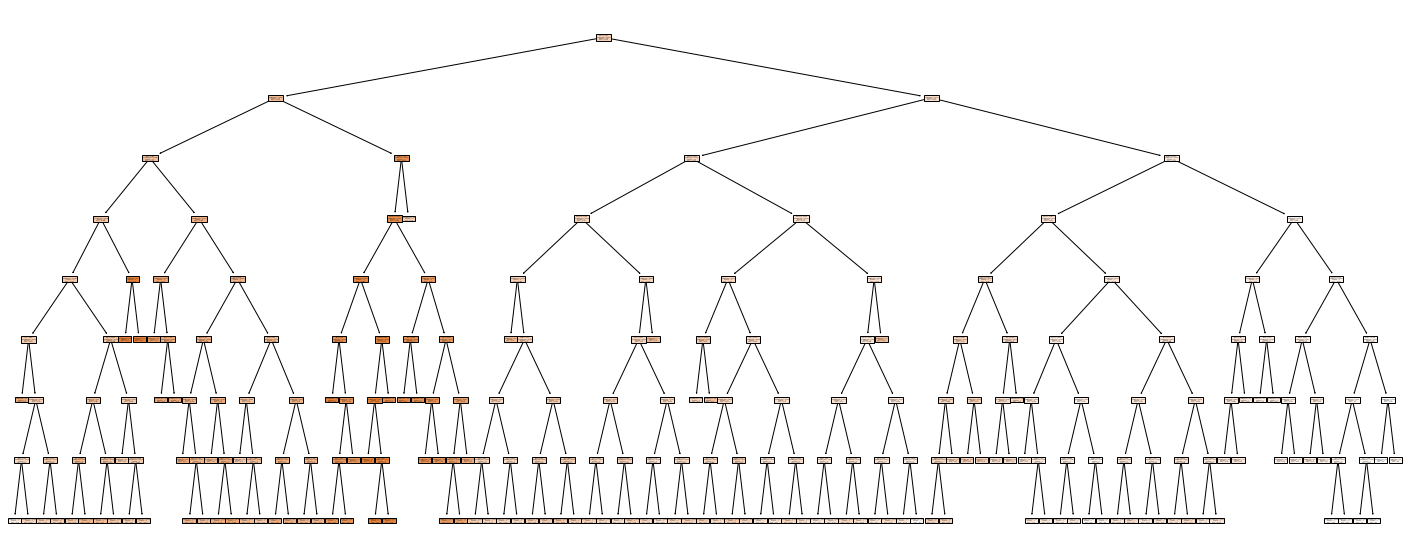

In [22]:
plt.figure(figsize=(25,10))
plot_tree(tree_1, 
          filled=True,
          feature_names=X.columns
          )
